In [1]:
#import useful librairies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("../Data/imdb_cleaned_data.csv", index_col=0, decimal=',',dtype={'RELEASE_YEAR':'O'})
df.head()

,ORIGINAL_TITLE,CAST,DIRECTOR,OVERVIEW,GENRES,PRODUCTION_COMPANIES,RUNTIME,RELEASE_DATE,RELEASE_YEAR,RELEASE_MONTH,RELEASE_DAY,BUDGET,REVENUE,PROFIT,VOTE_COUNT,VOTE_AVERAGE,POPULARITY
0,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,Twenty-two years after the events of Jurassic ...,"Action, Adventure, Science Fiction",Universal Studios,124.0,2015-06-09,2015.0,June,Tuesday,137999939.3,1.392446e+09,1.254446e+09,5562.0,6.5,32.985763
1,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,An apocalyptic story set in the furthest reach...,"Action, Adventure, Science Fiction",Village Roadshow Pictures,120.0,2015-05-13,2015.0,May,Wednesday,137999939.3,3.481613e+08,2.101614e+08,6185.0,7.1,28.419936
2,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,Beatrice Prior must confront her inner demons ...,"Adventure, Science Fiction, Thriller",Summit Entertainment,119.0,2015-03-18,2015.0,March,Wednesday,101199955.5,2.716190e+08,1.704191e+08,2480.0,6.3,13.112507
3,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,Thirty years after defeating the Galactic Empi...,"Action, Adventure, Science Fiction",Lucasfilm,136.0,2015-12-15,2015.0,December,Tuesday,183999919.0,1.902723e+09,1.718723e+09,5292.0,7.5,11.173104
4,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,Deckard Shaw seeks revenge against Dominic Tor...,"Action, Crime, Thriller",Universal Pictures,137.0,2015-04-01,2015.0,April,Wednesday,174799923.1,1.385749e+09,1.210949e+09,2947.0,7.3,9.335014


In [3]:
df['RELEASE_DATE'] = pd.to_datetime(df['RELEASE_DATE'])

In [4]:
df.dtypes

ORIGINAL_TITLE                  object
CAST                            object
DIRECTOR                        object
OVERVIEW                        object
GENRES                          object
PRODUCTION_COMPANIES            object
RUNTIME                        float64
RELEASE_DATE            datetime64[ns]
RELEASE_YEAR                    object
RELEASE_MONTH                   object
RELEASE_DAY                     object
BUDGET                         float64
REVENUE                        float64
PROFIT                         float64
VOTE_COUNT                     float64
VOTE_AVERAGE                   float64
POPULARITY                     float64
dtype: object

In [5]:
df_split_genre = df.copy()
split_genre = df_split_genre['GENRES'].str.split(',').apply(pd.Series, 1 ).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['GENRES'], axis=1).join(split_genre)

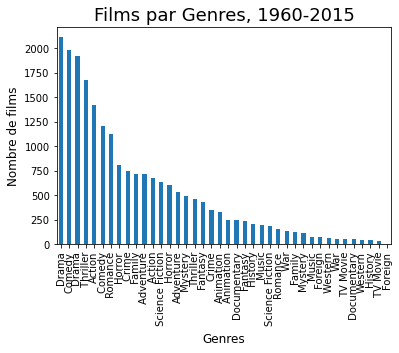

In [6]:
df_split_genre['genre_split'].value_counts().plot(kind='bar');
plt.title('Films par Genres, 1960-2015', size=18)
plt.xlabel('Genres', size=12)
plt.ylabel('Nombre de films', size=12);

<AxesSubplot:xlabel='RELEASE_MONTH'>

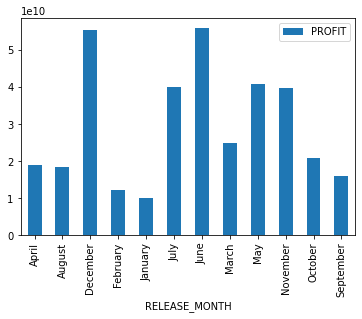

In [7]:
df[['RELEASE_MONTH','PROFIT']].groupby('RELEASE_MONTH').sum().plot(kind='bar')

<AxesSubplot:xlabel='RELEASE_DAY'>

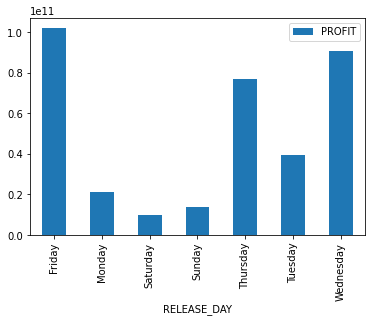

In [8]:
df[['RELEASE_DAY','PROFIT']].groupby('RELEASE_DAY').sum().plot(kind='bar')

<AxesSubplot:xlabel='RELEASE_YEAR', ylabel='PROFIT'>

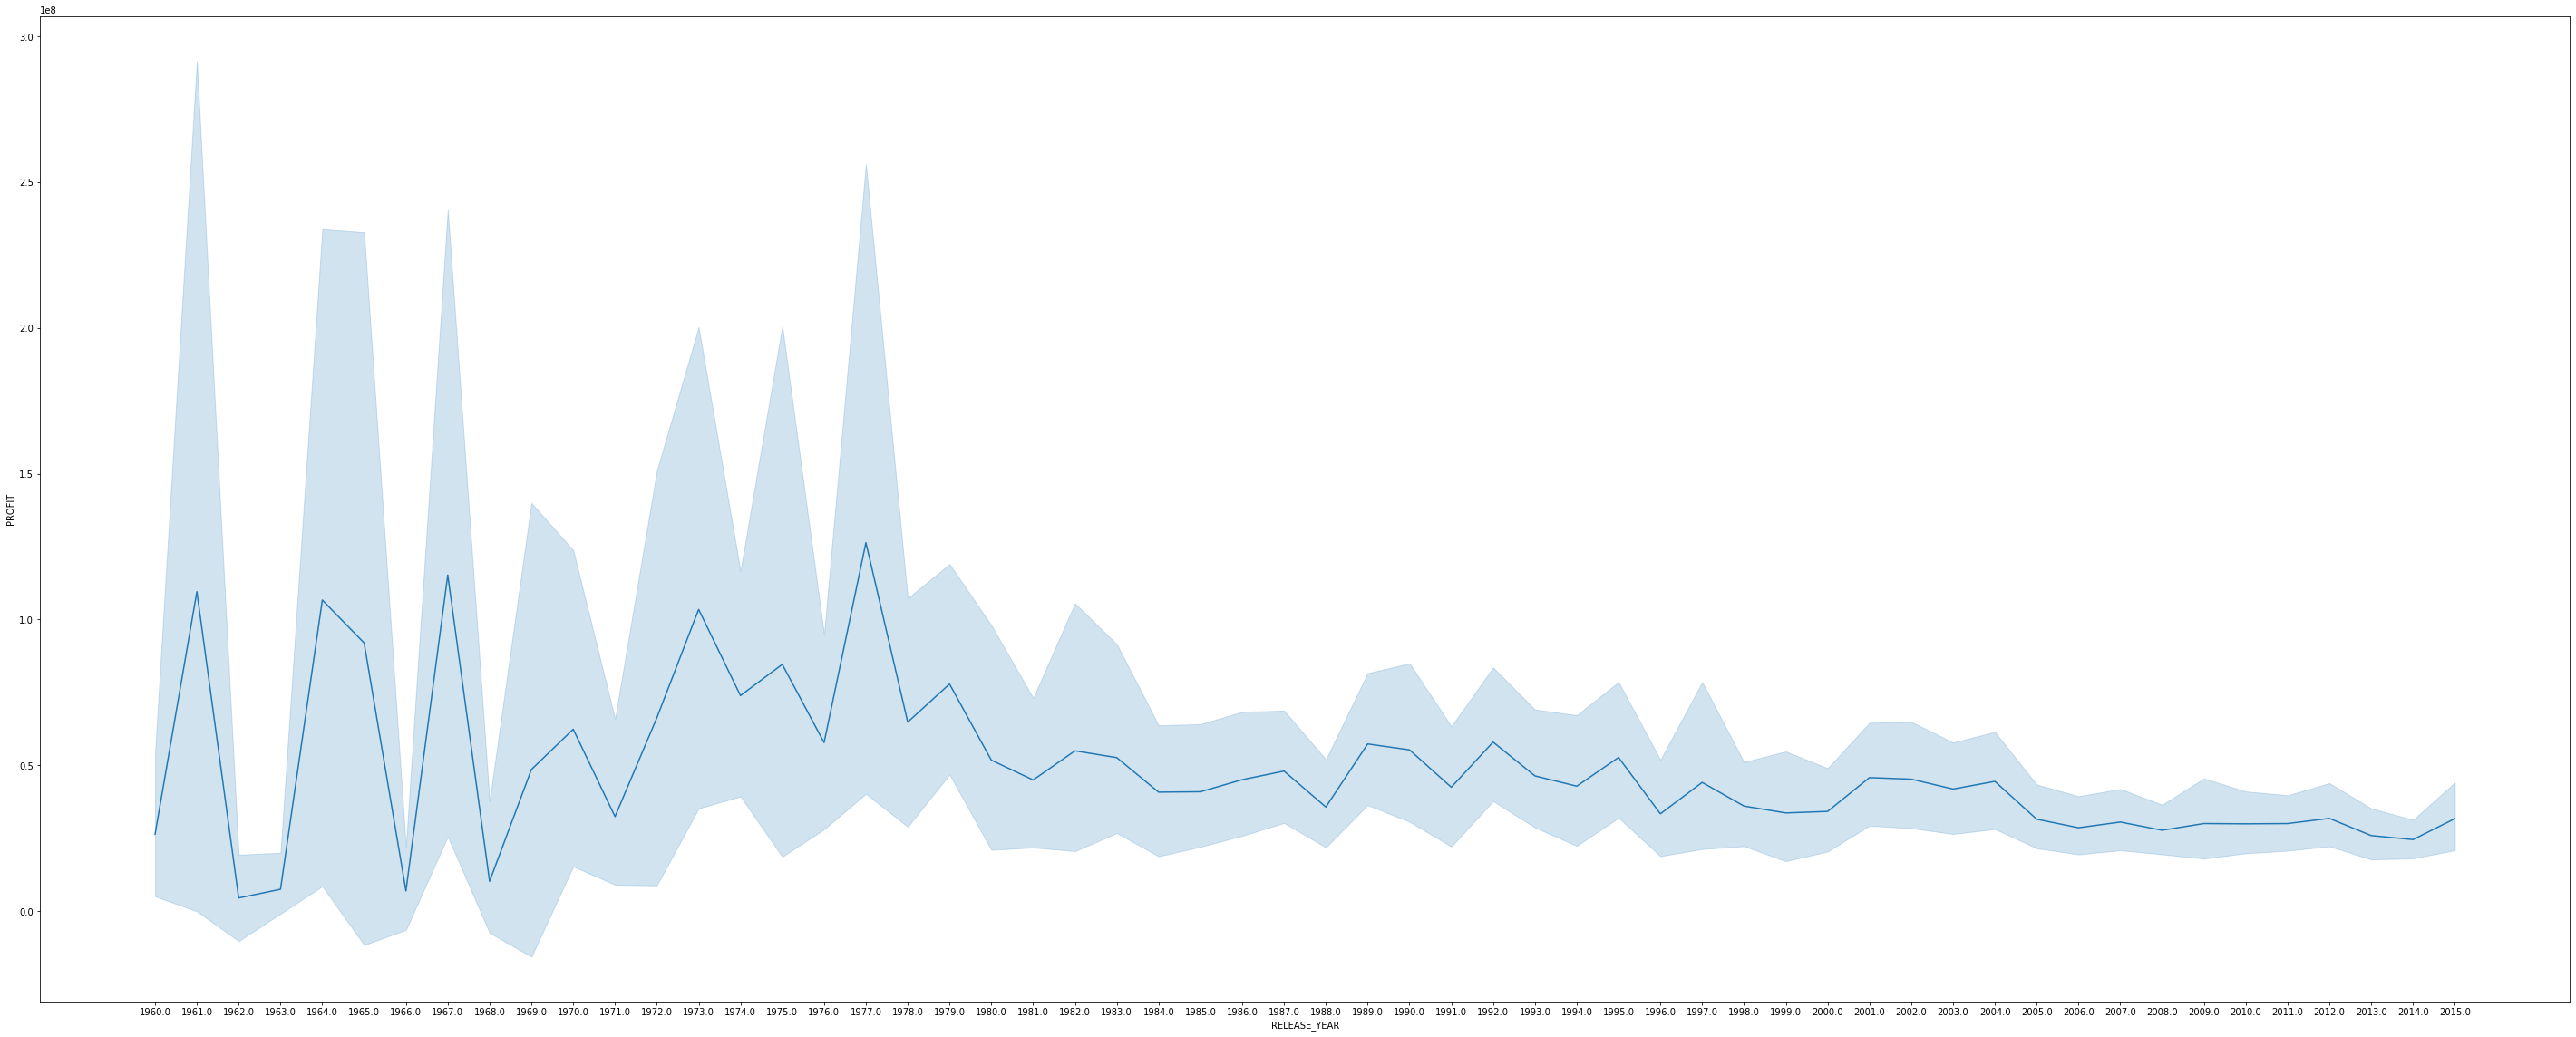

In [9]:
plt.figure(figsize=(50,20))
sns.lineplot(data=df.sort_values('RELEASE_YEAR'), x="RELEASE_YEAR", y="PROFIT")

<AxesSubplot:>

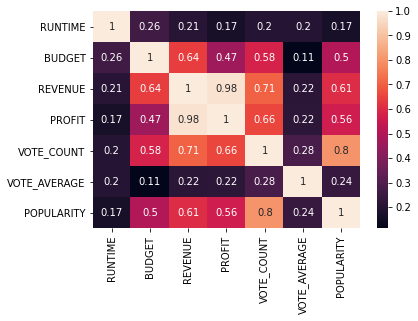

In [10]:
sns.heatmap(df.corr(), annot=True)

### Columns informations

In [13]:
df['PRODUCTION_COMPANIES'].nunique()

2911

In [14]:
df['GENRES'].nunique()

1073

In [15]:
df['DIRECTOR'].nunique()

4374